## Importing of Necessary Libraries

In [1]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import cv2
import os
import PIL
import pathlib
import splitfolders


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [3]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [4]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# # unzip folder
# import zipfile
# zip_file = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Skripsi_Klasifikasi_Sampah/garbage_classification.zip', 'r')
# zip_file.extractall('/content/drive/MyDrive/Colab Notebooks/Skripsi_Klasifikasi_Sampah/')

## Datasets Load and Splitting

In [7]:
base_ds = '/content/drive/MyDrive/Colab Notebooks/Skripsi_Klasifikasi_Sampah/garbage_classification'
base_ds = pathlib.Path(base_ds)
!ls "/content/drive/MyDrive/Colab Notebooks/Skripsi_Klasifikasi_Sampah/garbage_classification"

anorganic_brown-glass  anorganic_metal	  anorganic_white-glass  organic
anorganic_cardboard    anorganic_paper	  b3_battery
anorganic_green-glass  anorganic_plastic  b3_diaper_mask


In [8]:
splitfolders.ratio(base_ds, output='imgs', seed=123, ratio=(.7,.15,.15), group_prefix=None)

Copying files: 8137 files [01:17, 105.67 files/s]


In [9]:
train_dir = 'imgs/train'
train_dir = pathlib.Path(train_dir)
val_dir = 'imgs/val'
val_dir = pathlib.Path(val_dir)
test_dir = 'imgs/test'
test_dir = pathlib.Path(test_dir)

In [10]:
anorganic_brown_glass = [fn for fn in os.listdir(f'{base_ds}/anorganic_brown-glass') if fn.endswith('.jpg')]
anorganic_cardboard = [fn for fn in os.listdir(f'{base_ds}/anorganic_cardboard') if fn.endswith('.jpg')]
anorganic_green_glass = [fn for fn in os.listdir(f'{base_ds}/anorganic_green-glass') if fn.endswith('.jpg')]
anorganic_metal = [fn for fn in os.listdir(f'{base_ds}/anorganic_metal') if fn.endswith('.jpg')]
anorganic_paper = [fn for fn in os.listdir(f'{base_ds}/anorganic_paper') if fn.endswith('.jpg')]
anorganic_plastic = [fn for fn in os.listdir(f'{base_ds}/anorganic_plastic') if fn.endswith('.jpg')]
anorganic_white_glass = [fn for fn in os.listdir(f'{base_ds}/anorganic_white-glass') if fn.endswith('.jpg')]
b3_battery = [fn for fn in os.listdir(f'{base_ds}/b3_battery') if fn.endswith('.jpg')]
b3_diaper_mask = [fn for fn in os.listdir(f'{base_ds}/b3_diaper_mask') if fn.endswith('.jpg')]
organic = [fn for fn in os.listdir(f'{base_ds}/organic') if fn.endswith('.jpg')]

garbage_classes = []
garbage = [anorganic_brown_glass, anorganic_cardboard, anorganic_green_glass,
           anorganic_metal, anorganic_paper, anorganic_plastic,
           anorganic_white_glass, b3_battery, b3_diaper_mask, organic]

for i in os.listdir('imgs/train'):
    garbage_classes+=[i]
garbage_classes.sort()

In [11]:
anorganic_brown_glass_train = [fn for fn in os.listdir(f'{train_dir}/anorganic_brown-glass') if fn.endswith('.jpg')]
anorganic_cardboard_train = [fn for fn in os.listdir(f'{train_dir}/anorganic_cardboard') if fn.endswith('.jpg')]
anorganic_green_glass_train = [fn for fn in os.listdir(f'{train_dir}/anorganic_green-glass') if fn.endswith('.jpg')]
anorganic_metal_train = [fn for fn in os.listdir(f'{train_dir}/anorganic_metal') if fn.endswith('.jpg')]
anorganic_paper_train = [fn for fn in os.listdir(f'{train_dir}/anorganic_paper') if fn.endswith('.jpg')]
anorganic_plastic_train = [fn for fn in os.listdir(f'{train_dir}/anorganic_plastic') if fn.endswith('.jpg')]
anorganic_white_glass_train = [fn for fn in os.listdir(f'{train_dir}/anorganic_white-glass') if fn.endswith('.jpg')]
b3_battery_train = [fn for fn in os.listdir(f'{train_dir}/b3_battery') if fn.endswith('.jpg')]
b3_diaper_mask_train = [fn for fn in os.listdir(f'{train_dir}/b3_diaper_mask') if fn.endswith('.jpg')]
organic_train = [fn for fn in os.listdir(f'{train_dir}/organic') if fn.endswith('.jpg')]

garbage_train = [anorganic_brown_glass_train, anorganic_cardboard_train, anorganic_green_glass_train,
           anorganic_metal_train, anorganic_paper_train, anorganic_plastic_train,
           anorganic_white_glass_train, b3_battery_train, b3_diaper_mask_train, organic_train]


In [12]:
anorganic_brown_glass_val = [fn for fn in os.listdir(f'{val_dir}/anorganic_brown-glass') if fn.endswith('.jpg')]
anorganic_cardboard_val = [fn for fn in os.listdir(f'{val_dir}/anorganic_cardboard') if fn.endswith('.jpg')]
anorganic_green_glass_val = [fn for fn in os.listdir(f'{val_dir}/anorganic_green-glass') if fn.endswith('.jpg')]
anorganic_metal_val = [fn for fn in os.listdir(f'{val_dir}/anorganic_metal') if fn.endswith('.jpg')]
anorganic_paper_val = [fn for fn in os.listdir(f'{val_dir}/anorganic_paper') if fn.endswith('.jpg')]
anorganic_plastic_val = [fn for fn in os.listdir(f'{val_dir}/anorganic_plastic') if fn.endswith('.jpg')]
anorganic_white_glass_val = [fn for fn in os.listdir(f'{val_dir}/anorganic_white-glass') if fn.endswith('.jpg')]
b3_battery_val = [fn for fn in os.listdir(f'{val_dir}/b3_battery') if fn.endswith('.jpg')]
b3_diaper_mask_val = [fn for fn in os.listdir(f'{val_dir}/b3_diaper_mask') if fn.endswith('.jpg')]
organic_val = [fn for fn in os.listdir(f'{val_dir}/organic') if fn.endswith('.jpg')]

garbage_val = [anorganic_brown_glass_val, anorganic_cardboard_val, anorganic_green_glass_val,
           anorganic_metal_val, anorganic_paper_val, anorganic_plastic_val,
           anorganic_white_glass_val, b3_battery_val, b3_diaper_mask_val, organic_val]

In [13]:
anorganic_brown_glass_test = [fn for fn in os.listdir(f'{test_dir}/anorganic_brown-glass') if fn.endswith('.jpg')]
anorganic_cardboard_test = [fn for fn in os.listdir(f'{test_dir}/anorganic_cardboard') if fn.endswith('.jpg')]
anorganic_green_glass_test = [fn for fn in os.listdir(f'{test_dir}/anorganic_green-glass') if fn.endswith('.jpg')]
anorganic_metal_test = [fn for fn in os.listdir(f'{test_dir}/anorganic_metal') if fn.endswith('.jpg')]
anorganic_paper_test = [fn for fn in os.listdir(f'{test_dir}/anorganic_paper') if fn.endswith('.jpg')]
anorganic_plastic_test = [fn for fn in os.listdir(f'{test_dir}/anorganic_plastic') if fn.endswith('.jpg')]
anorganic_white_glass_test = [fn for fn in os.listdir(f'{test_dir}/anorganic_white-glass') if fn.endswith('.jpg')]
b3_battery_test = [fn for fn in os.listdir(f'{test_dir}/b3_battery') if fn.endswith('.jpg')]
b3_diaper_mask_test = [fn for fn in os.listdir(f'{test_dir}/b3_diaper_mask') if fn.endswith('.jpg')]
organic_test = [fn for fn in os.listdir(f'{test_dir}/organic') if fn.endswith('.jpg')]

garbage_test = [anorganic_brown_glass_test, anorganic_cardboard_test, anorganic_green_glass_test,
           anorganic_metal_test, anorganic_paper_test, anorganic_plastic_test,
           anorganic_white_glass_test, b3_battery_test, b3_diaper_mask_val, organic_test]

## Dataset Exploration

Total images: 8134
Total number of classes: 10
Total anorganic_brown-glass images: 607
Total anorganic_cardboard images: 891
Total anorganic_green-glass images: 629
Total anorganic_metal images: 769
Total anorganic_paper images: 1050
Total anorganic_plastic images: 865
Total anorganic_white-glass images: 775
Total b3_battery images: 945
Total b3_diaper_mask images: 618
Total organic images: 985


<Figure size 1512x360 with 0 Axes>

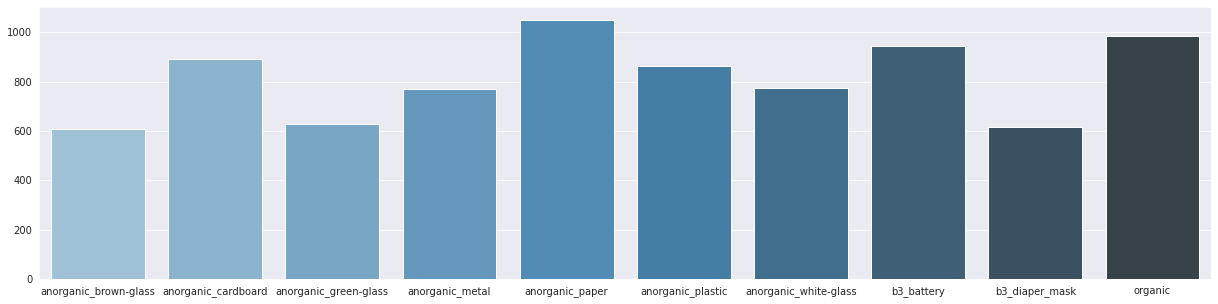

In [14]:
image_count = len(list(base_ds.glob('*/*.jpg')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(garbage_classes)}')
count = 0
garbage_count = []

for x in garbage_classes:
  print(f'Total {x} images: {len(garbage[count])}')
  garbage_count.append(len(garbage[count]))
  count += 1

plt.figure(figsize = (21,5))
sns.set_style('darkgrid')
sns.barplot(x=garbage_classes, y=garbage_count, palette="Blues_d")
plt.show()

Total images train: 5690
Total number of classes: 10
Total anorganic_brown-glass images: 424
Total anorganic_cardboard images: 623
Total anorganic_green-glass images: 440
Total anorganic_metal images: 538
Total anorganic_paper images: 735
Total anorganic_plastic images: 605
Total anorganic_white-glass images: 542
Total b3_battery images: 661
Total b3_diaper_mask images: 433
Total organic images: 689


<Figure size 1512x360 with 0 Axes>

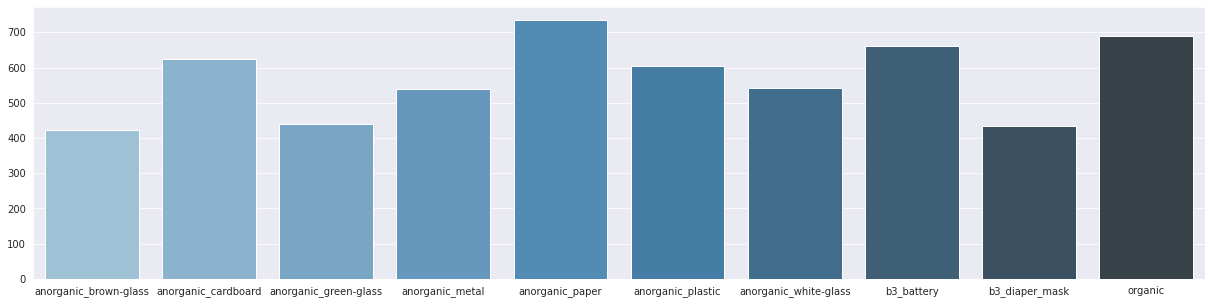

In [15]:
image_count = len(list(train_dir.glob('*/*.jpg')))
print(f'Total images train: {image_count}')
print(f'Total number of classes: {len(garbage_classes)}')
count = 0
garbage_count = []

for x in garbage_classes:
  print(f'Total {x} images: {len(garbage_train[count])}')
  garbage_count.append(len(garbage_train[count]))
  count += 1

plt.figure(figsize = (21,5))
sns.set_style('darkgrid')
sns.barplot(x=garbage_classes, y=garbage_count, palette="Blues_d")
plt.show()

Total images validation: 1215
Total number of classes: 10
Total anorganic_brown-glass images: 91
Total anorganic_cardboard images: 133
Total anorganic_green-glass images: 94
Total anorganic_metal images: 115
Total anorganic_paper images: 157
Total anorganic_plastic images: 129
Total anorganic_white-glass images: 116
Total b3_battery images: 141
Total b3_diaper_mask images: 92
Total organic images: 147


<Figure size 1512x360 with 0 Axes>

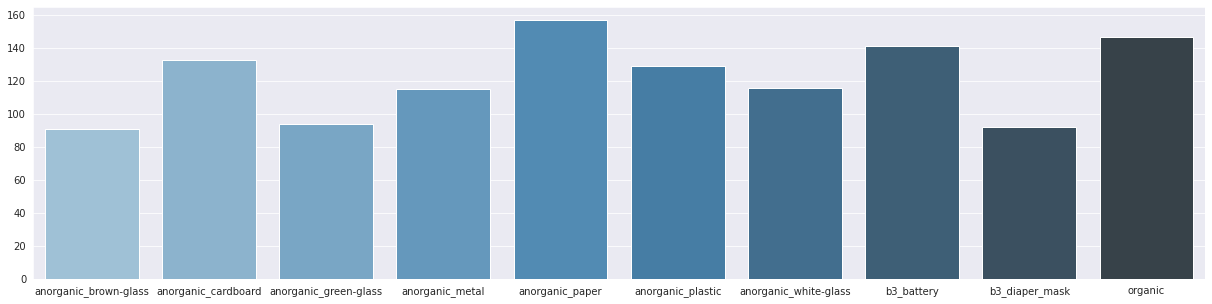

In [16]:
image_count = len(list(val_dir.glob('*/*.jpg')))
print(f'Total images validation: {image_count}')
print(f'Total number of classes: {len(garbage_classes)}')
count = 0
garbage_count = []

for x in garbage_classes:
  print(f'Total {x} images: {len(garbage_val[count])}')
  garbage_count.append(len(garbage_val[count]))
  count += 1

plt.figure(figsize = (21,5))
sns.set_style('darkgrid')
sns.barplot(x=garbage_classes, y=garbage_count, palette="Blues_d")
plt.show()

Total images test: 1229
Total number of classes: 10
Total anorganic_brown-glass images: 92
Total anorganic_cardboard images: 135
Total anorganic_green-glass images: 95
Total anorganic_metal images: 116
Total anorganic_paper images: 158
Total anorganic_plastic images: 131
Total anorganic_white-glass images: 117
Total b3_battery images: 143
Total b3_diaper_mask images: 92
Total organic images: 149


<Figure size 1512x360 with 0 Axes>

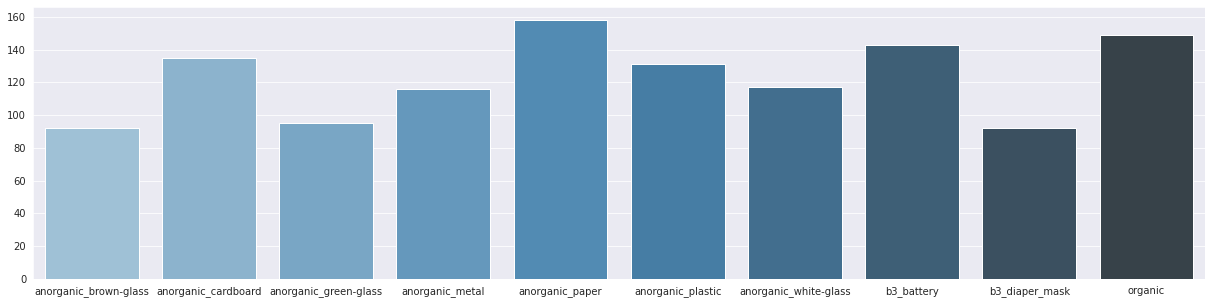

In [17]:
image_count = len(list(test_dir.glob('*/*.jpg')))
print(f'Total images test: {image_count}')
print(f'Total number of classes: {len(garbage_classes)}')
count = 0
garbage_count = []

for x in garbage_classes:
  print(f'Total {x} images: {len(garbage_test[count])}')
  garbage_count.append(len(garbage_test[count]))
  count += 1

plt.figure(figsize = (21,5))
sns.set_style('darkgrid')
sns.barplot(x=garbage_classes, y=garbage_count, palette="Blues_d")
plt.show()

## Sample Images


Image dimensions: (384, 512, 3)


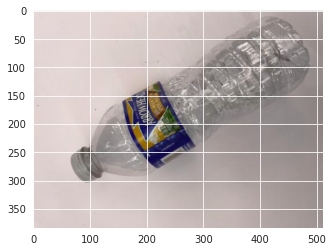

In [18]:
sample_img = cv2.imread('imgs/test/anorganic_plastic/plastic10.jpg')
plt.imshow(sample_img)
print(f'\nImage dimensions: {sample_img.shape}')


Image dimensions: (384, 512, 3)


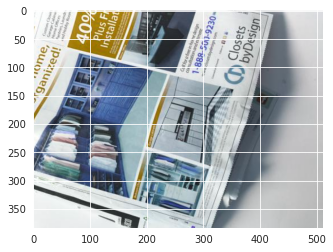

In [19]:
sample_img = cv2.imread('imgs/test/anorganic_paper/paper1000.jpg')
plt.imshow(sample_img)
print(f'\nImage dimensions: {sample_img.shape}')


Image dimensions: (384, 512, 3)


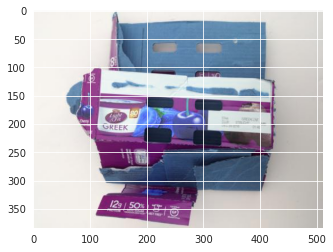

In [20]:
sample_img = cv2.imread('imgs/test/anorganic_cardboard/cardboard10.jpg')
plt.imshow(sample_img)
print(f'\nImage dimensions: {sample_img.shape}')

In [21]:
def load_random_img(dir, label):
  plt.figure(figsize=(24,15))
  i=0
  for label in garbage_classes:
    i+=1
    plt.subplot(1, 10, i)
    file = random.choice(os.listdir(f'{dir}/{label}'))
    image_path = os.path.join(f'{dir}/{label}', file)
    img=cv2.imread(image_path)
    plt.title(label)
    plt.imshow(img)
    plt.grid(None)
    plt.axis('off')

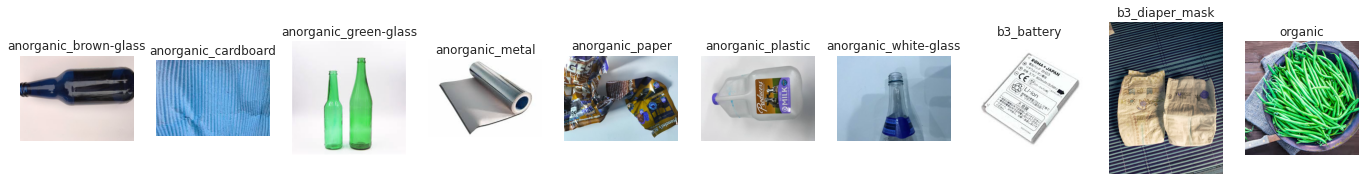

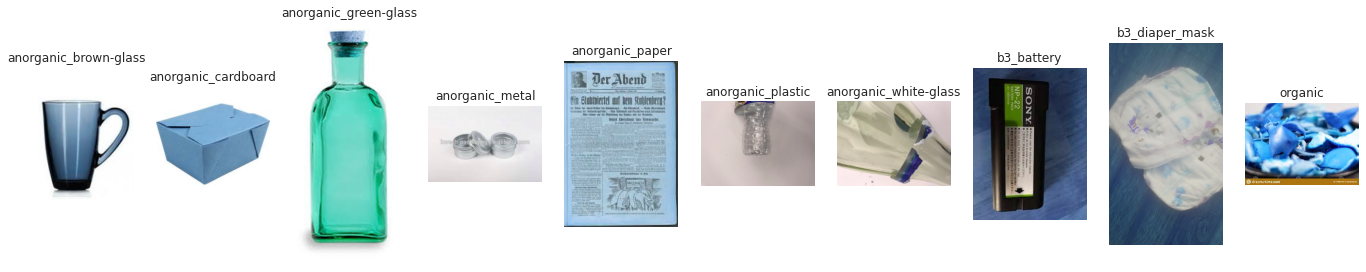

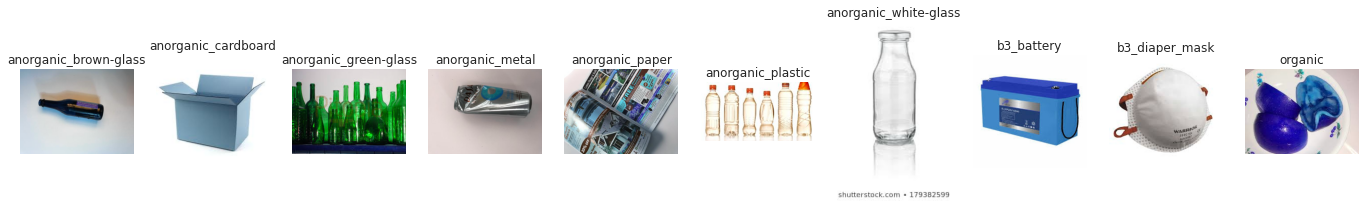

In [22]:
for i in range(3):
  load_random_img(base_ds, garbage_classes)

## Data Pre-Processing

In [23]:
batch_size = 64
img_height, img_width = 300, 300
input_shape = (img_height, img_width, 3)

In [24]:
# Create Training Generator
train_datagen = ImageDataGenerator( rescale=1./255,
                                    shear_range=0.2,
                                    rotation_range=30,
                                    fill_mode='nearest',
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True
                                    )

# Create Validation Generator
val_datagen = ImageDataGenerator( rescale=1./255, )

# Create Test Generator
test_datagen = ImageDataGenerator( rescale=1./255, )

In [25]:
train_generator = train_datagen.flow_from_directory(
    'imgs/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    subset = "training",
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb')

val_generator = val_datagen.flow_from_directory(
    'imgs/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb')

test_generator = test_datagen.flow_from_directory(
    'imgs/test',
    target_size = (img_height, img_width),
    shuffle=True,
    color_mode='rgb')

Found 5691 images belonging to 10 classes.
Found 1216 images belonging to 10 classes.
Found 1230 images belonging to 10 classes.


**Resize**

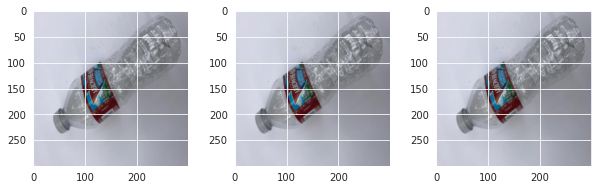

In [26]:
from torchvision import transforms
import torchvision
import torch
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('imgs/test/anorganic_plastic/plastic10.jpg')

flip = torchvision.transforms.Compose([
    torchvision.transforms.Resize((300,300))
    ])

fig, axes = plt.subplots(1, 3, figsize=(10, 8))
fig.subplots_adjust(wspace=0.3)
for ax in axes.flatten():
    ax.imshow(flip(img))

**Shear**

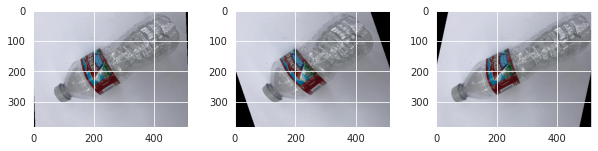

In [27]:
shear = torchvision.transforms.RandomAffine(0, shear=20)

fig, axes = plt.subplots(1, 3, figsize=(10, 8))
fig.subplots_adjust(wspace=0.3)
for ax in axes.flatten():
    ax.imshow(shear(img))

**Rotation**

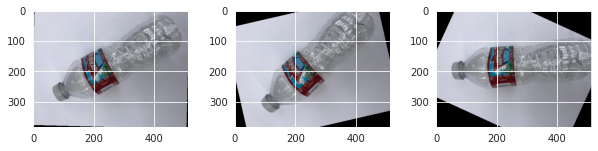

In [28]:
rotate = torchvision.transforms.RandomRotation(degrees=30)

fig, axes = plt.subplots(1, 3, figsize=(10, 8))
fig.subplots_adjust(wspace=0.3)
for ax in axes.flatten():
    ax.imshow(rotate(img))

**Vertical Flip**

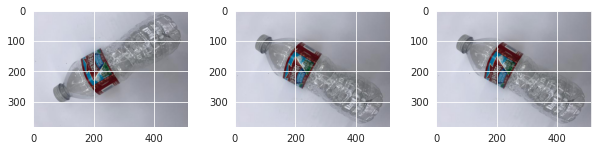

In [29]:
flip = transforms.Compose([
       transforms.RandomVerticalFlip(),
])

fig, axes = plt.subplots(1, 3, figsize=(10, 8))
fig.subplots_adjust(wspace=0.3)
for ax in axes.flatten():
    ax.imshow(flip(img))

**Horizontal Flip**

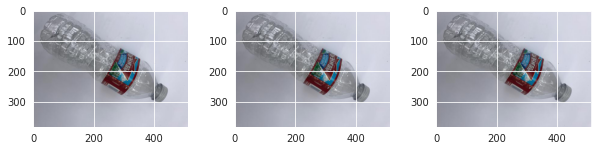

In [30]:
flip = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip()
])

fig, axes = plt.subplots(1, 3, figsize=(10, 8))
fig.subplots_adjust(wspace=0.3)
for ax in axes.flatten():
    ax.imshow(flip(img))

**Translate**

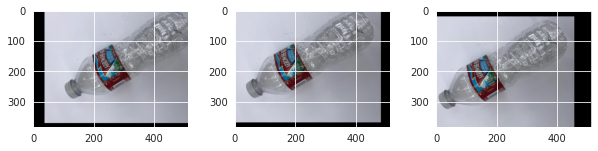

In [31]:
translate = torchvision.transforms.RandomAffine(degrees=0, translate=(0.2, 0.2))

fig, axes = plt.subplots(1, 3, figsize=(10, 8))
fig.subplots_adjust(wspace=0.3)
for ax in axes.flatten():
    ax.imshow(translate(img))

## Modeling

In [32]:
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
vgg16.trainable = False
inputs = tf.keras.Input(input_shape)
x = vgg16(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs, x)

58900480/58889256 [==============================] - 0s 0us/step


In [33]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 9, 9, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
___________________________________________

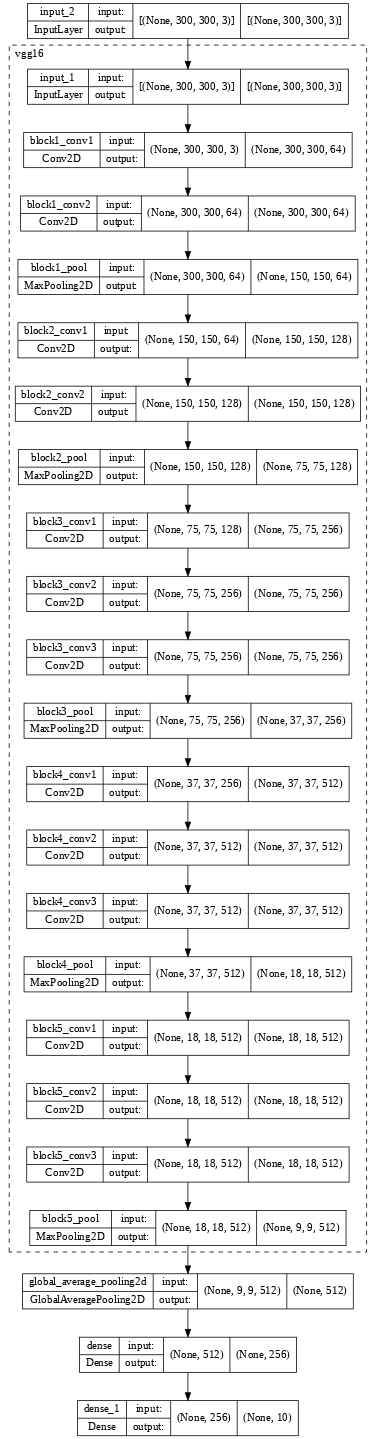

In [34]:
model_vis = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_vis

In [35]:
# Compile Model
model.compile(loss = 'categorical_crossentropy',
              optimizer='Adam',
              metrics = ['accuracy'])

## Training

In [36]:
checkpointer = ModelCheckpoint(filepath='saved_models/model_vgg16.hdf5', 
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [37]:
history = model.fit(train_generator,
                    epochs = 40,
                    validation_data = val_generator,
                    callbacks=callbacks)

Epoch 1/40
89/89 [==============================] - ETA: 0s - loss: 1.7120 - accuracy: 0.4511
Epoch 1: val_accuracy improved from -inf to 0.64474, saving model to saved_models/model_vgg16.hdf5
89/89 [==============================] - 158s 2s/step - loss: 1.7120 - accuracy: 0.4511 - val_loss: 1.2276 - val_accuracy: 0.6447 - lr: 0.0010
Epoch 2/40
89/89 [==============================] - ETA: 0s - loss: 1.2139 - accuracy: 0.6257
Epoch 2: val_accuracy improved from 0.64474 to 0.68174, saving model to saved_models/model_vgg16.hdf5
89/89 [==============================] - 139s 2s/step - loss: 1.2139 - accuracy: 0.6257 - val_loss: 0.9758 - val_accuracy: 0.6817 - lr: 0.0010
Epoch 3/40
89/89 [==============================] - ETA: 0s - loss: 1.0348 - accuracy: 0.6711
Epoch 3: val_accuracy improved from 0.68174 to 0.73931, saving model to saved_models/model_vgg16.hdf5
89/89 [==============================] - 138s 2s/step - loss: 1.0348 - accuracy: 0.6711 - val_loss: 0.8475 - val_accuracy: 0.7393

## Evaluation

In [38]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

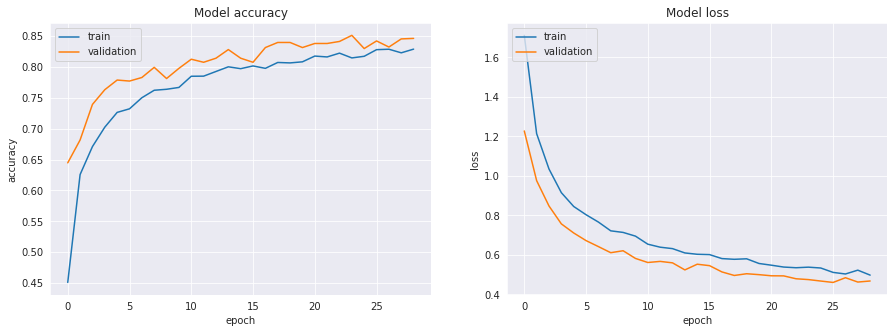

In [39]:
plot_train_history(history)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(val_generator)

Text(0.5, 141.0, 'Predicted Label')

Text(141.0, 0.5, 'True Label')

[Text(0.5, 0, 'anorganic_brown-glass'),
 Text(1.5, 0, 'anorganic_cardboard'),
 Text(2.5, 0, 'anorganic_green-glass'),
 Text(3.5, 0, 'anorganic_metal'),
 Text(4.5, 0, 'anorganic_paper'),
 Text(5.5, 0, 'anorganic_plastic'),
 Text(6.5, 0, 'anorganic_white-glass'),
 Text(7.5, 0, 'b3_battery'),
 Text(8.5, 0, 'b3_diaper_mask'),
 Text(9.5, 0, 'organic')]

[Text(0, 0.5, 'anorganic_brown-glass'),
 Text(0, 1.5, 'anorganic_cardboard'),
 Text(0, 2.5, 'anorganic_green-glass'),
 Text(0, 3.5, 'anorganic_metal'),
 Text(0, 4.5, 'anorganic_paper'),
 Text(0, 5.5, 'anorganic_plastic'),
 Text(0, 6.5, 'anorganic_white-glass'),
 Text(0, 7.5, 'b3_battery'),
 Text(0, 8.5, 'b3_diaper_mask'),
 Text(0, 9.5, 'organic')]

Text(0.5, 1.0, 'Confusion Matrix')

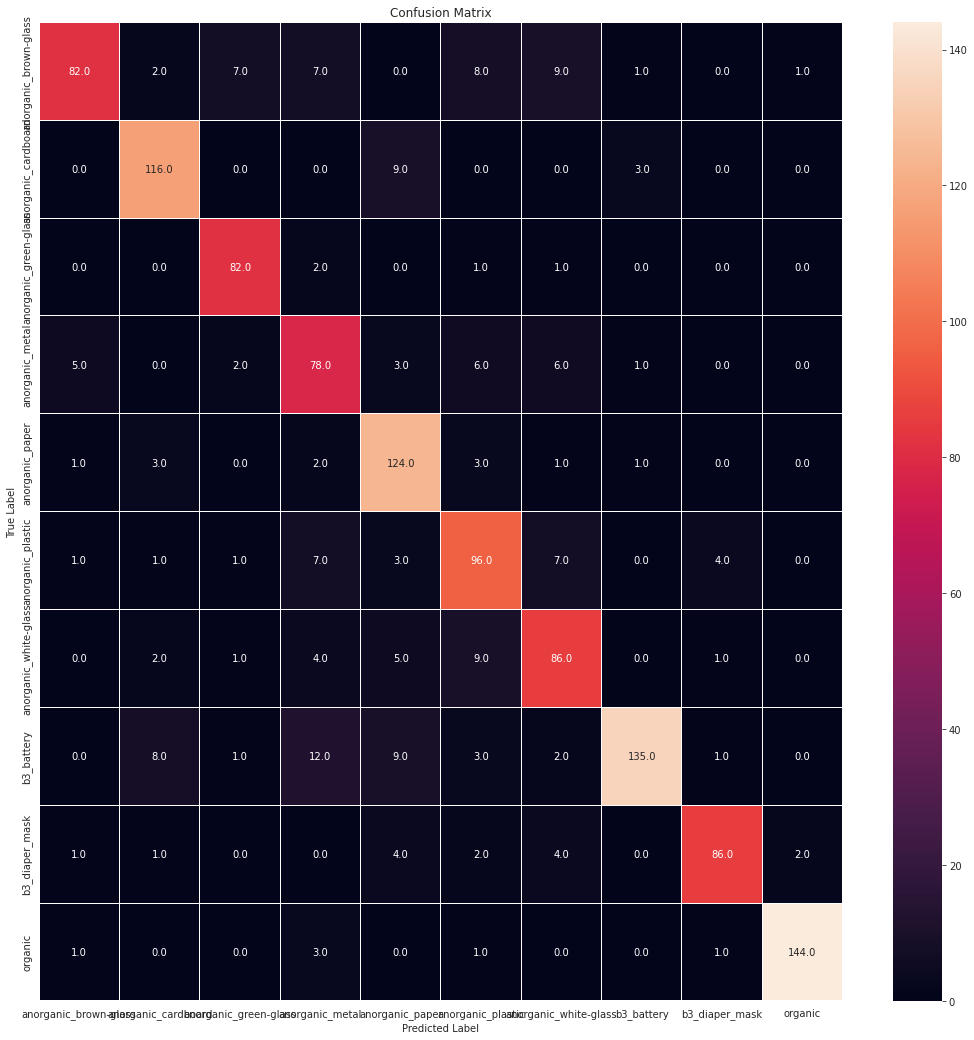

In [41]:
y_pred = np.argmax(Y_pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, val_generator.classes)
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(val_generator.class_indices)
ax.yaxis.set_ticklabels(garbage_classes)
plt.title("Confusion Matrix")
plt.show()

In [42]:
report = classification_report(val_generator.classes, y_pred, target_names=garbage_classes, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
anorganic_brown-glass,0.700855,0.901099,0.788462,91.000000
anorganic_cardboard,0.906250,0.872180,0.888889,133.000000
anorganic_green-glass,0.953488,0.872340,0.911111,94.000000
anorganic_metal,0.772277,0.678261,0.722222,115.000000
anorganic_paper,0.918519,0.789809,0.849315,157.000000
anorganic_plastic,0.800000,0.744186,0.771084,129.000000
anorganic_white-glass,0.796296,0.741379,0.767857,116.000000
b3_battery,0.789474,0.957447,0.865385,141.000000
b3_diaper_mask,0.860000,0.924731,0.891192,93.000000
organic,0.960000,0.979592,0.969697,147.000000


In [43]:
score = model.evaluate(test_generator, verbose=1)

39/39 [==============================] - 18s 360ms/step - loss: 0.5430 - accuracy: 0.8252


<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Truth: b3_battery\nPrediction:b3_battery')

(-0.5, 299.5, 299.5, -0.5)

Text(0.5, 1.0, 'Truth: organic\nPrediction:organic')

(-0.5, 299.5, 299.5, -0.5)

Text(0.5, 1.0, 'Truth: organic\nPrediction:organic')

(-0.5, 299.5, 299.5, -0.5)

Text(0.5, 1.0, 'Truth: anorganic_white-glass\nPrediction:anorganic_white-glass')

(-0.5, 299.5, 299.5, -0.5)

Text(0.5, 1.0, 'Truth: b3_diaper_mask\nPrediction:b3_diaper_mask')

(-0.5, 299.5, 299.5, -0.5)

Text(0.5, 1.0, 'Truth: anorganic_paper\nPrediction:anorganic_paper')

(-0.5, 299.5, 299.5, -0.5)

Text(0.5, 1.0, 'Truth: b3_battery\nPrediction:b3_battery')

(-0.5, 299.5, 299.5, -0.5)

Text(0.5, 1.0, 'Truth: b3_battery\nPrediction:b3_battery')

(-0.5, 299.5, 299.5, -0.5)

Text(0.5, 1.0, 'Truth: anorganic_plastic\nPrediction:anorganic_plastic')

(-0.5, 299.5, 299.5, -0.5)

Text(0.5, 1.0, 'Truth: b3_diaper_mask\nPrediction:anorganic_plastic')

(-0.5, 299.5, 299.5, -0.5)

Text(0.5, 1.0, 'Truth: anorganic_green-glass\nPrediction:anorganic_green-glass')

(-0.5, 299.5, 299.5, -0.5)

Text(0.5, 1.0, 'Truth: anorganic_green-glass\nPrediction:anorganic_green-glass')

(-0.5, 299.5, 299.5, -0.5)

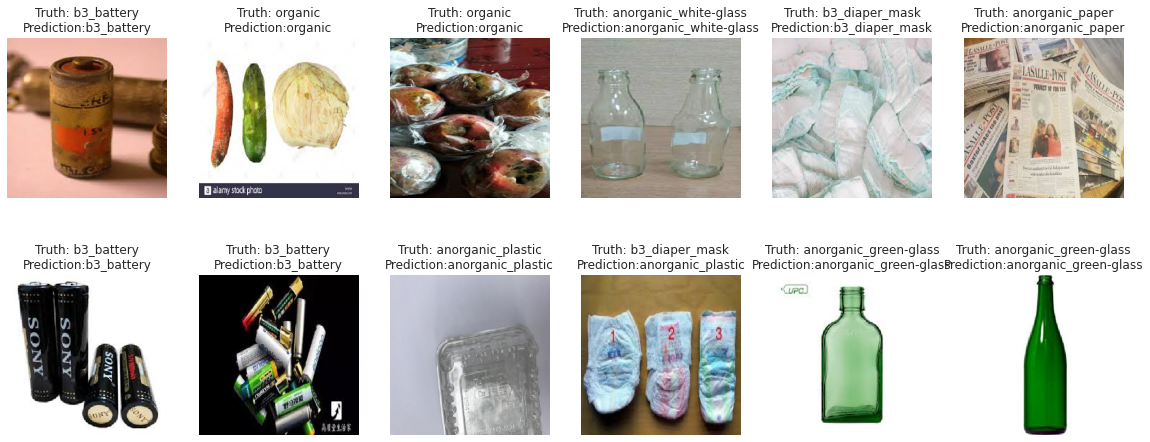

In [44]:
plt.figure(figsize=(20, 8))
x, label = test_generator.next()
for i in range(18):
  plt.subplot(3, 6, i+1)
  plt.imshow(x[i])
  result = np.where(label[i]==1)
  predict = model(tf.expand_dims(x[i], 0))
  score = tf.nn.softmax(predict[0])
  score_label = garbage_classes[np.argmax(score)]
  plt.title(f'Truth: {garbage_classes[result[0][0]]}\nPrediction:{score_label}')
  plt.axis(False)